# Project: Multiple Regression Analysis for Beer Ratings

### Kate Grosch and Lucas Baker

We would like to determine whether factors like ABV, reviewer age, and beer appearance contribute to the overall rating of a beer, using data from online craft beer ratings.

To begin our analysis, we will load the project packages and the dataset.

In [1]:
# loading the packages and modules

%matplotlib inline

# general packages
import numpy as np
import pandas as pd
import sklearn

# for statistics
import scipy.stats as stats
import statsmodels.api as sm

# for visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Important Notes about the Data

We do some basic data cleaning below: We remove ABV values outside of 3 standard deviations from the mean (to remove some junk ABV values we had) and we remove rows without a valid reviewer gender and age. 

In [2]:
#loading and cleaning the data

df = pd.read_csv("beer.csv")

df = df.rename(index=str, columns={'beer/ABV': 'ABV', 
                                   'user/gender':'gender', 
                                   'user/ageInSeconds':'reviewerAgeInSeconds', 
                                   'review/overall':'overall', 
                                   'beer/beerId':'beerId', 
                                   'beer/brewerId':'brewerId', 
                                   'review/appearance':'appearance', 
                                   'review/aroma':'aroma', 
                                   'review/palate':'palate', 
                                   'review/taste':'taste', 
                                   'review/timeUnix': 'unixPostTime'})

df = df[np.abs(df.ABV-df.ABV.mean()) <= (3*df.ABV.std())]
df = df[df.reviewerAgeInSeconds.notnull()]
df = df[df.gender.notnull()]

Y = df['overall']
df = df.drop(['review/text', 
              'review/timeStruct',
              'user/birthdayRaw',
              'user/birthdayUnix',
              'index',
              'overall', 
              'beer/name',
              'beer/style', 
              'user/profileName'], axis=1)

df.describe()


,ABV,beerId,brewerId,appearance,aroma,palate,taste,unixPostTime,reviewerAgeInSeconds
count,7704.000000,7704.000000,7704.000000,7704.000000,7704.000000,7704.000000,7704.000000,7.704000e+03,7.704000e+03
mean,7.454991,21805.936397,3068.560618,3.912318,3.897326,3.866498,3.952687,1.236645e+09,1.167445e+09
std,2.272365,18540.411751,5187.312029,0.590726,0.671394,0.668260,0.714050,6.573249e+07,3.088040e+08
min,0.500000,175.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.932515e+08,7.034366e+08
25%,5.500000,5441.000000,395.000000,3.500000,3.500000,3.500000,3.500000,1.198043e+09,9.775586e+08
50%,7.000000,18968.000000,1199.000000,4.000000,4.000000,4.000000,4.000000,1.248133e+09,1.096639e+09
75%,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.500000,4.500000,1.289380e+09,1.274541e+09
max,14.000000,77207.000000,26990.000000,5.000000,5.000000,5.000000,5.000000,1.326257e+09,3.594723e+09


### Model and Variables

Our full list of variables is ABV, brewer, appearance rating, aroma rating, palate rating, taste rating, review submission date, reviewer age, and reviewer gender. We got this dataset from Kaggle, and the CSV is available at https://github.com/katiegrosch/beer-data-analysis. 

Our y and x<sub>i</sub>'s are as follows:

y: Overall rating, on a range of [1.0, 5.0].
x<sub>1</sub> blah
x<sub>2</sub> blah
x<sub>3</sub> blah
x<sub>4</sub> blah
x<sub>5</sub> blah
x<sub>6</sub> blah

To begin our analysis, let's look at a graph of every x<sub>i</sub> versus our target variable (overall rating).

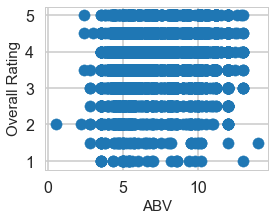

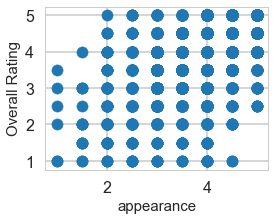

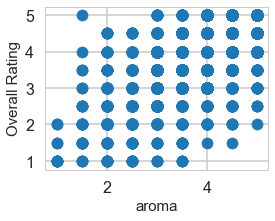

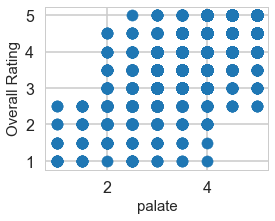

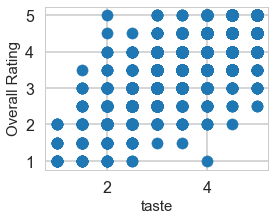

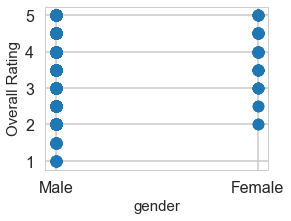

In [8]:
ratings = df.drop(['beerId','brewerId','unixPostTime','reviewerAgeInSeconds'], axis=1)

for column in ratings:
    plt.figure(figsize=(4, 3))
    plt.scatter(ratings[column], Y)
    plt.ylabel('Overall Rating', size=15)
    plt.xlabel(column, size=15)

We can see some generally positive correlation between various beer qualities (like taste and aroma) and its overall rating. This isn't surprising, because intuitively it makes sense that a beer with better individual qualities will also get a high rating overall. 

We can also see some other things: it doesn't look like there's a strong relationship between ABV and rating, and it also looks like females don't tend to give extremely low ratings.

Let's also see if any of the variables correlate with each other. This could help us mitigate unnecessary variance in our regression's beta values.

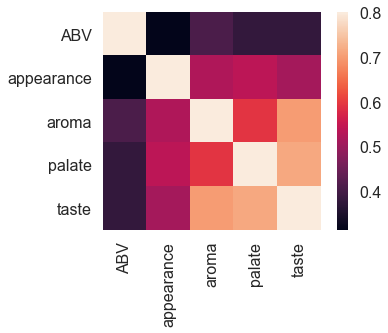

In [7]:
corrmat = ratings.corr()

sns.heatmap(corrmat, vmax=.8, square=True);


In [24]:
df.columns

Index(['ABV', 'beerId', 'brewerId', 'appearance', 'aroma', 'palate', 'taste',
       'unixPostTime', 'reviewerAgeInSeconds', 'gender'],
      dtype='object')